In [57]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [58]:
pip install -q youtube_transcript_api

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


# Extracting Video ID from URL

In [59]:
from IPython.display import YouTubeVideo

In [60]:
video=input("Enter the link of your YouTube Video: ")

In [61]:
vid_id = video.split("=")[1]
vid_id

'v4t0E3S1N1k'

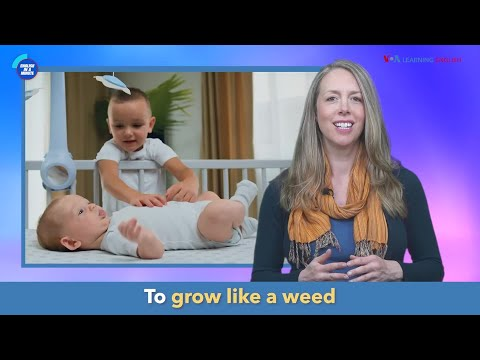

In [62]:
YouTubeVideo(vid_id)

# Converting Youtube video to audio then to text

In [63]:
pip install pytube -q 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [64]:
from pytube import YouTube

In [65]:
yt = YouTube(video)

In [66]:
#downloading Yt_video's audio
yt.streams \
  .filter(only_audio = True, file_extension = 'mp4') \
  .first() \
  .download(filename = 'ytaudio.mp4') 

'/Users/dharmanshusingh/Downloads/6thsem/Gen_AI/YT_summarizer1/ytaudio.mp4'

In [67]:
#! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav

# English ASR(Automatic Speech recognition) with HuggingSound

In [68]:
pip install huggingsound

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
# pip install --upgrade pip

In [70]:
from huggingsound import SpeechRecognitionModel

In [71]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [72]:
device

'cpu'

In [73]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device)

03/18/2024 12:10:26 - INFO - huggingsound.speech_recognition.model - Loading model...


# Audio Chunking

In [74]:
pip install librosa

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
import librosa

In [78]:
input_file = './ytaudio.wav'

In [79]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000,
    hop_length=16000
)

16000


In [80]:
import soundfile as sf

In [81]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [82]:
i

2

# Audio Transcription / ASR / Speech to Text

In [83]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'./{a}.wav') 

In [84]:
audio_path

['./0.wav', './1.wav', './2.wav']

In [85]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 3/3 [00:11<00:00,  3.91s/it]


In [86]:
full_transcript = ' '

In [87]:
for item in transcriptions:
  full_transcript += ''.join(item['transcription'])

In [88]:
len(full_transcript)

520

# Text Summarisation

In [89]:
from transformers import pipeline

In [94]:
 #model="google/pegasus-xsum"
summarization = pipeline('summarization', model="sshleifer/distilbart-cnn-12-6")

In [99]:
summarized_text = summarization(full_transcript)

Your max_length is set to 142, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


In [100]:
summarized_text[0]['summary_text']

' We mostly use this expression when talking about how fast children grow . But what does grow like a weed mean in other situations? Welcome to english in a minute.  welcome to   welcome back to  English in  a minute . Do you want to see pictures from my trip home? i would love to butis me with mylittle cousin arlo little hes tarler than you .'

In [101]:
#text chunking 
num_iters = int(len(full_transcript)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + full_transcript[start:end])
  out = summarization(full_transcript[start:end], min_length = 5, max_length=20)
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

input text 
 welcome to english in a minuteif youever gardened you know weeds grow superfast they can take over a garden overnight but what does grow like a weed mean in other situationshey dan do you want to see pictures from my trip home  i would love to butis me with mylittle cousin arlo little hes tarler than you i know he is growing like a weed he's only tento give a beardto grow like a weed just mean to grow very quickly we mostly use this expression when talking about how fast children growand that's english in a minute
Summarized text
 We mostly use this expression when talking about how fast children grow . But what does grow


In [102]:
print(summarized_text)

[' We mostly use this expression when talking about how fast children grow . But what does grow']
